# Set up

In [12]:
import pickle
import os
import glob
import matplotlib.pyplot as plt
from datetime import datetime
import numpy as np
from parameters import setParams
from main import Replay_Sim

In [42]:
# load parameters
params = setParams()
# dictionary of the different replay strategies (models)
models_dict = {'EVB': {'n_plan': 20, 'set_gain_to_one': False, 'set_need_to_one': False},
               'gain_only': {'n_plan': 20, 'set_gain_to_one': False, 'set_need_to_one': True},
               'need_only': {'n_plan': 20, 'set_gain_to_one': True, 'set_need_to_one': False},
               'dyna': {'n_plan': 20, 'set_gain_to_one': True, 'set_need_to_one': True},
               'no_replay': {'n_plan': 0, 'set_gain_to_one': True, 'set_need_to_one': True},
               'prioritized_sweeping': {'n_plan': 20, 'set_gain_to_one': True, 'set_need_to_one': True},
               }

In [43]:
def extract_data(date):
    model_data = {}
    counter = 0
    for model in models_dict:
        model_data[model] = {}
        counter += 1
        list_dir = [file for file in glob.glob('experiments/' + date + 'data/' + model + '*')]
        for k in range(len(list_dir)):
            with open('experiments/' + date + 'data/' + model + str(k) + '.pkl', 'rb') as f:
                model_data[model][k] = pickle.load(f)
        if counter == 1:
            print('date: ', date)
            params_dict = model_data[model][k].params_dict
            for key in params_dict:
                print(key, ': ', params_dict[key])
    return model_data, params_dict

In [44]:
def plot_steps_to_goal(date, model_data, params_dict):
    fig = plt.figure()
    x = np.arange(1, params_dict['MAX_N_EPISODES'])
    fig_title = 'Steps per Episode'
    plt.title(fig_title)
    plt.ylabel('Number of steps to reward')
    plt.xlabel('# Episodes')
    plt.xticks(np.arange(0, params_dict['MAX_N_EPISODES']+1, 5))
    plt.xlim(1, params_dict['MAX_N_EPISODES'])
    plt.axvline(params_dict['MAX_N_EPISODES']/2, linestyle=':', color='gray', label='goal change')

    steps_per_episode = {}
    for model in models_dict:
        steps_per_episode[model] = np.empty((params_dict['N_SIMULATIONS'], params_dict['MAX_N_EPISODES']))
        for k in range(params_dict['N_SIMULATIONS']):
            steps_per_episode[model][k] = model_data[model][k].steps_per_episode
        # plot figure for model across all simulations
        spe_means = np.nanmean(steps_per_episode[model], axis=0)
        spe_stds = np.std(steps_per_episode[model], axis=0) / np.sqrt(params_dict['N_SIMULATIONS'])
        plt.plot(range(1,1+len(spe_means)), spe_means, label=model)
        plt.fill_between(range(1,1+len(spe_means)), spe_means - spe_stds, spe_means + spe_stds, alpha=0.3)
    plt.legend(loc="upper right")
    file_name = fig_title.replace(" ", "_")
    fig.savefig('experiments/{}figures/{}.png'.format(date, file_name), dpi=2000)

In [45]:
def plot_time_to_goal(date, model_data, params_dict):
    fig = plt.figure()
    x = np.arange(1, params_dict['MAX_N_EPISODES'])
    fig_title = 'Total Time per Episode'
    plt.title(fig_title)
    plt.ylabel('Time to reward')
    plt.xlabel('# Episodes')
    plt.xticks(np.arange(0, params_dict['MAX_N_EPISODES']+1, 5))
    plt.xlim(1, params_dict['MAX_N_EPISODES'])
    plt.axvline(params_dict['MAX_N_EPISODES']/2, linestyle=':', color='gray', label='goal change')

    time_per_episode = {}
    for model in models_dict:
        time_per_episode[model] = np.empty((params_dict['N_SIMULATIONS'], params_dict['MAX_N_EPISODES']))
        for k in range(params_dict['N_SIMULATIONS']):
            time_per_episode[model][k] = model_data[model][k].full_time_per_episode
        # plot figure for model across all simulations
        spe_means = np.nanmean(time_per_episode[model], axis=0)
        spe_stds = np.std(time_per_episode[model], axis=0) / np.sqrt(params_dict['N_SIMULATIONS'])
        plt.plot(range(1,1+len(spe_means)), spe_means, label=model)
        plt.fill_between(range(1,1+len(spe_means)), spe_means - spe_stds, spe_means + spe_stds, alpha=0.3)
    plt.legend(loc="upper right")
    file_name = fig_title.replace(" ", "_")
    fig.savefig('experiments/{}figures/{}.png'.format(date, file_name), dpi=2000)

In [46]:
def plot_time_to_goal_log(date, model_data):
    fig = plt.figure()
    x = np.arange(1, params_dict['MAX_N_EPISODES'])
    fig_title = 'Total Time per Episode (log)'
    plt.title(fig_title)
    plt.ylabel('Time to reward')
    plt.xlabel('# Episodes')
    plt.xticks(np.arange(0, params_dict['MAX_N_EPISODES']+1, 5))
    plt.xlim(1, params_dict['MAX_N_EPISODES'])
    plt.axvline(params_dict['MAX_N_EPISODES']/2, linestyle=':', color='gray', label='goal change')

    time_per_episode = {}
    for model in models_dict:
        time_per_episode[model] = np.empty((params_dict['N_SIMULATIONS'], params_dict['MAX_N_EPISODES']))
        for k in range(params_dict['N_SIMULATIONS']):
            time_per_episode[model][k] = model_data[model][k].full_time_per_episode
        # plot figure for model across all simulations
        spe_means = np.nanmean(np.log(time_per_episode[model]), axis=0)
        spe_stds = np.std(np.log(time_per_episode[model]), axis=0) / np.sqrt(params_dict['N_SIMULATIONS'])
        plt.plot(range(1,1+len(spe_means)), spe_means, label=model)
        plt.fill_between(range(1,1+len(spe_means)), spe_means - spe_stds, spe_means + spe_stds, alpha=0.3)
    plt.legend(loc="upper right")
    file_name = fig_title.replace(" ", "_")
    fig.savefig('experiments/{}figures/{}.png'.format(date, file_name), dpi=2000)

# PART 1:
# Mattar Maze
# Agent allowed to plan at previous goal state
# (Mattar_ppT)

In [47]:
# extract all of the simulation data for this experiment (i.e. date)
date = 'Mattar_ppT/'
model_data, params_dict = extract_data(date)

date:  Mattar_ppT/
N_SIMULATIONS :  30
MAX_N_STEPS :  100000
MAX_N_EPISODES :  40
actPolicy :  softmax
gamma :  0.9
alpha :  1.0
lamb :  0
TLearnRate :  0.9
softmaxInvT :  5
epsilon :  0.05
PS_thresh :  0
preExplore :  True
Tgoal2start :  True
rewOnlyPositive :  True
onVSoffPolicy :  off-policy
nPlan :  20
EVMthresh :  0
expandFurther :  True
planPolicy :  softmax
planOnlyAtGorS :  True
change_goal :  True
plan_at_prev_goal :  True
baselineGain :  1e-10
tieBreak :  min
onlineVSoffline :  online
remove_samestate :  True
allowLoops :  False
copyQinPlanBkps :  False
setAllGainToOne :  False
setAllNeedToOne :  False
setAllNeedToZero :  False
plot_agent :  False
plot_Q :  False
maze :  [[0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 1. 0. 0. 0. 0. 1. 0.]
 [0. 0. 1. 0. 0. 0. 0. 1. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0.]]
s_start :  [[2 0]]
s_start_rand :  False
s_end :  [[0 8]]
s_end_change :  [[5 0]]
rewMag :  [[1]]
rewSTD :  [[0.1]]
rewProb :  [[

## Steps per episode

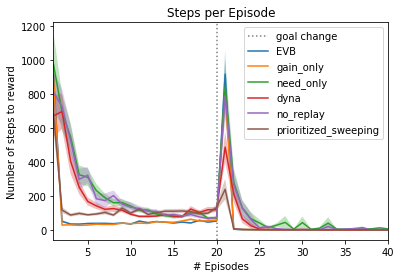

In [48]:
# plot average number of steps to goal (i.e. per episode) for each model
plot_steps_to_goal(date, model_data, params_dict)

## Total time per episode

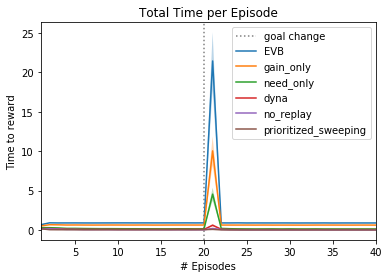

In [49]:
# plot average total time to goal (i.e. per episode) for each model
plot_time_to_goal(date, model_data, params_dict)

## Total time per episode (log)

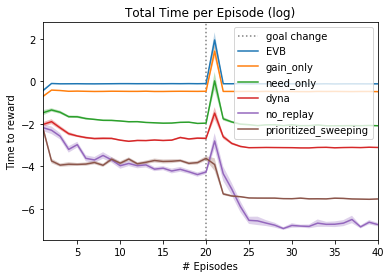

In [50]:
# plot average logarithm of the total time to goal (i.e. per episode) for each model
plot_time_to_goal_log(date, model_data)

In [35]:
fig = plt.figure(10)
x = np.arange(1, params_dict['MAX_N_EPISODES'])
fig_title = 'Steps per Episode'
plt.title(fig_title)
plt.ylabel('Number of steps to reward')
plt.xlabel('# Episodes')
plt.xticks(np.arange(0, params_dict['MAX_N_EPISODES']+1, 5))
plt.xlim(1, params_dict['MAX_N_EPISODES'])
plt.axvline(params_dict['MAX_N_EPISODES']/2, linestyle=':', color='gray', label='goal change')

steps_per_episode = {}
for model in models_dict:
    steps_per_episode[model] = np.empty((params_dict['N_SIMULATIONS'], params_dict['MAX_N_EPISODES']))
    for k in range(params_dict['N_SIMULATIONS']):
        steps_per_episode[model][k] = model_data[model][k].steps_per_episode
    # plot figure for model across all simulations
    spe_means = np.nanmean(steps_per_episode[model], axis=0)
    spe_stds = np.std(steps_per_episode[model], axis=0) / np.sqrt(params_dict['N_SIMULATIONS'])
    plt.plot(range(1,1+len(spe_means)), spe_means, label=model)
    plt.fill_between(range(1,1+len(spe_means)), spe_means - spe_stds, spe_means + spe_stds, alpha=0.3)
plt.legend(loc="upper right")
file_name = fig_title.replace(" ", "_")
fig.savefig('experiments/{}figures/{}.png'.format(date, file_name), dpi=2000)

{'mattar': {'EVB': {0: <main.Replay_Sim at 0x31a81e4c0>,
   1: <main.Replay_Sim at 0x49167c490>,
   2: <main.Replay_Sim at 0x31a833400>,
   3: <main.Replay_Sim at 0x232bd3640>,
   4: <main.Replay_Sim at 0x232c00dc0>,
   5: <main.Replay_Sim at 0x232c00910>,
   6: <main.Replay_Sim at 0x232c00250>,
   7: <main.Replay_Sim at 0x31a81af70>,
   8: <main.Replay_Sim at 0x31a81aa30>,
   9: <main.Replay_Sim at 0x31a81a550>,
   10: <main.Replay_Sim at 0x31a81a1f0>,
   11: <main.Replay_Sim at 0x31a81afa0>,
   12: <main.Replay_Sim at 0x31a81a160>,
   13: <main.Replay_Sim at 0x31a81ae80>,
   14: <main.Replay_Sim at 0x232bc8490>,
   15: <main.Replay_Sim at 0x232bc8850>,
   16: <main.Replay_Sim at 0x75ebc8970>,
   17: <main.Replay_Sim at 0x75ebc8df0>,
   18: <main.Replay_Sim at 0x75ebc81c0>,
   19: <main.Replay_Sim at 0x75ebc8070>,
   20: <main.Replay_Sim at 0x11b8e6160>,
   21: <main.Replay_Sim at 0x11b8e6190>,
   22: <main.Replay_Sim at 0x748789850>,
   23: <main.Replay_Sim at 0x748789220>,
   24: <m

# PART 2:
# Mattar Maze
# Agent NOT allowed to plan at previous goal state
# (Mattar_ppF)

In [22]:
# extract all of the simulation data for this experiment (i.e. date)
date = 'Mattar_ppF/'
model_data, params_dict = extract_data(date)

date:  Mattar_ppF/
N_SIMULATIONS :  30
MAX_N_STEPS :  100000
MAX_N_EPISODES :  40
actPolicy :  softmax
gamma :  0.9
alpha :  1.0
lamb :  0
TLearnRate :  0.9
softmaxInvT :  5
epsilon :  0.05
PS_thresh :  0
preExplore :  True
Tgoal2start :  True
rewOnlyPositive :  True
onVSoffPolicy :  off-policy
nPlan :  20
EVMthresh :  0
expandFurther :  True
planPolicy :  softmax
planOnlyAtGorS :  True
change_goal :  True
plan_at_prev_goal :  False
baselineGain :  1e-10
tieBreak :  min
onlineVSoffline :  online
remove_samestate :  True
allowLoops :  False
copyQinPlanBkps :  False
setAllGainToOne :  False
setAllNeedToOne :  False
setAllNeedToZero :  False
plot_agent :  False
plot_Q :  False
maze :  [[0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 1. 0. 0. 0. 0. 1. 0.]
 [0. 0. 1. 0. 0. 0. 0. 1. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0.]]
s_start :  [[2 0]]
s_start_rand :  False
s_end :  [[0 8]]
s_end_change :  [[5 0]]
rewMag :  [[1]]
rewSTD :  [[0.1]]
rewProb :  [

## Steps per episode

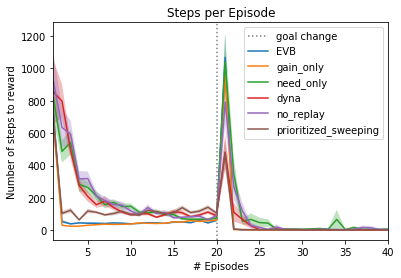

In [23]:
# plot average number of steps to goal (i.e. per episode) for each model
plot_steps_to_goal(date, model_data, params_dict)

## Total time per episode

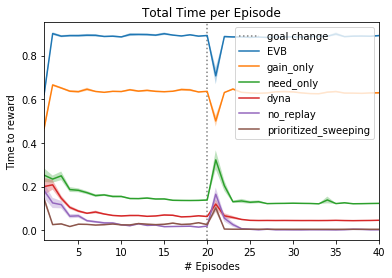

In [24]:
# plot average total time to goal (i.e. per episode) for each model
plot_time_to_goal(date, model_data, params_dict) # change to 'total_time_per_episode' - Turn into bar chart comparing total time of each model averaged over all experiment with SEM

## Total time per episode (log)

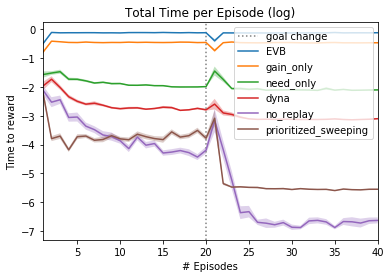

In [25]:
# plot average logarithm of the total time to goal (i.e. per episode) for each model
plot_time_to_goal_log(date, model_data)

# PART 3:
# Mattar-like Constrained Maze
# Agent allowed to plan at previous goal state
# (Mattar_const_ppT)

In [26]:
# extract all of the simulation data for this experiment (i.e. date)
date = 'Mattar_const_ppT/'
model_data, params_dict = extract_data(date)

date:  Mattar_const_ppT/
N_SIMULATIONS :  30
MAX_N_STEPS :  100000
MAX_N_EPISODES :  40
actPolicy :  softmax
gamma :  0.9
alpha :  1.0
lamb :  0
TLearnRate :  0.9
softmaxInvT :  5
epsilon :  0.05
PS_thresh :  0
preExplore :  True
Tgoal2start :  True
rewOnlyPositive :  True
onVSoffPolicy :  off-policy
nPlan :  20
EVMthresh :  0
expandFurther :  True
planPolicy :  softmax
planOnlyAtGorS :  True
change_goal :  True
plan_at_prev_goal :  True
baselineGain :  1e-10
tieBreak :  min
onlineVSoffline :  online
remove_samestate :  True
allowLoops :  False
copyQinPlanBkps :  False
setAllGainToOne :  False
setAllNeedToOne :  False
setAllNeedToZero :  False
plot_agent :  False
plot_Q :  False
maze :  [[0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 1. 1. 0. 0. 0. 1. 0.]
 [0. 0. 1. 0. 0. 1. 0. 1. 0.]
 [0. 1. 1. 0. 0. 1. 0. 1. 0.]
 [0. 0. 0. 0. 1. 1. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0.]]
s_start :  [[2 0]]
s_start_rand :  False
s_end :  [[0 8]]
s_end_change :  [[5 0]]
rewMag :  [[1]]
rewSTD :  [[0.1]]
rewProb

## Steps per episode

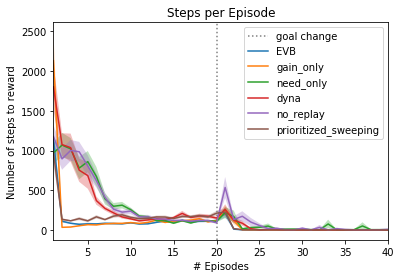

In [27]:
# plot average number of steps to goal (i.e. per episode) for each model
plot_steps_to_goal(date, model_data, params_dict)

## Total time per episode

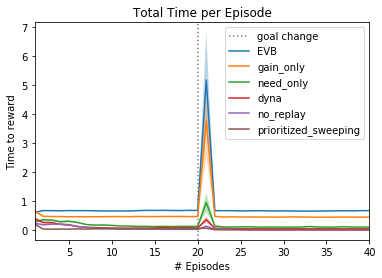

In [28]:
# plot average total time to goal (i.e. per episode) for each model
plot_time_to_goal(date, model_data, params_dict)

## Total time per episode (log)

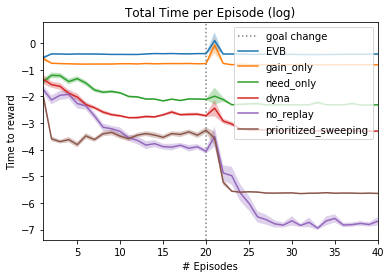

In [29]:
# plot average logarithm of the total time to goal (i.e. per episode) for each model
plot_time_to_goal_log(date, model_data)

# PART 4:
# Mattar-like Open Maze
# Agent allowed to plan at previous goal state
# (Mattar_open_ppT)

In [30]:
# extract all of the simulation data for this experiment (i.e. date)
date = 'Mattar_open_ppT/'
model_data, params_dict = extract_data(date)

date:  Mattar_open_ppT/
N_SIMULATIONS :  30
MAX_N_STEPS :  100000
MAX_N_EPISODES :  40
actPolicy :  softmax
gamma :  0.9
alpha :  1.0
lamb :  0
TLearnRate :  0.9
softmaxInvT :  5
epsilon :  0.05
PS_thresh :  0
preExplore :  True
Tgoal2start :  True
rewOnlyPositive :  True
onVSoffPolicy :  off-policy
nPlan :  20
EVMthresh :  0
expandFurther :  True
planPolicy :  softmax
planOnlyAtGorS :  True
change_goal :  True
plan_at_prev_goal :  True
baselineGain :  1e-10
tieBreak :  min
onlineVSoffline :  online
remove_samestate :  True
allowLoops :  False
copyQinPlanBkps :  False
setAllGainToOne :  False
setAllNeedToOne :  False
setAllNeedToZero :  False
plot_agent :  False
plot_Q :  False
maze :  [[1. 1. 1. 1. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 1. 1. 1. 1. 1. 1. 1.]]
s_start :  [[2 0]]
s_start_rand :  False
s_end :  [[0 8]]
s_end_change :  [[5 0]]
rewMag :  [[1]]
rewSTD :  [[0.1]]
rewProb 

## Steps per episode

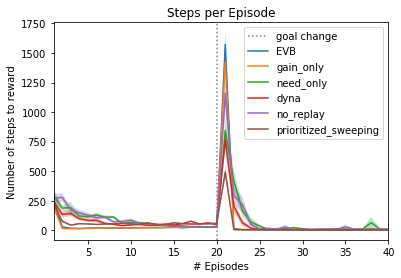

In [31]:
# plot average number of steps to goal (i.e. per episode) for each model
plot_steps_to_goal(date, model_data, params_dict)

## Total time per episode

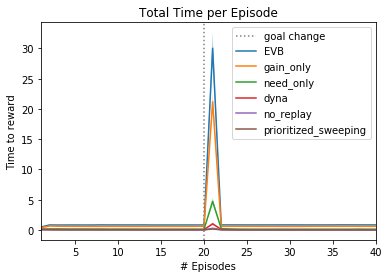

In [32]:
# plot average total time to goal (i.e. per episode) for each model
plot_time_to_goal(date, model_data, params_dict)

## Total time per episode (log)

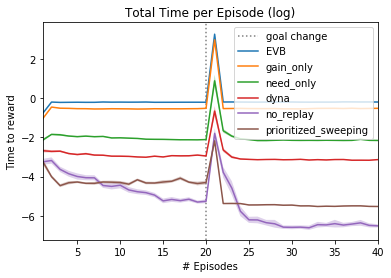

In [33]:
# plot average logarithm of the total time to goal (i.e. per episode) for each model
plot_time_to_goal_log(date, model_data)

In [ ]:
# TO DO:
# 0) Create plots for large mazes
# 1) Plot planning time
# 2) For EVB, gain and need, plot EVB time (for former two, plot gain time as well)
# 3) Qualitatively observe what EVB and gain are doing after change in goal location (does the agent keep going back to the goal location)?
# 4) Qualitatively observe Q value depreciation between EVB, PS, gain, need